In [51]:
import os
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns

In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

/home/yuval/anaconda2.4/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The first column is the DataFrame index and has no meaning here. 
There are six different time series (a-f) for the different sensors. 
The different robots are denoted by the ids column.

In [19]:
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [21]:
y.head()

1    True
2    True
3    True
4    True
5    True
dtype: bool

In [12]:
print ('{} failures out of {} '.format(len(y[y]),len(y)))

21 failures out of 88 


In [ ]:
# Create plots with pre-defined labels.

ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')



# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

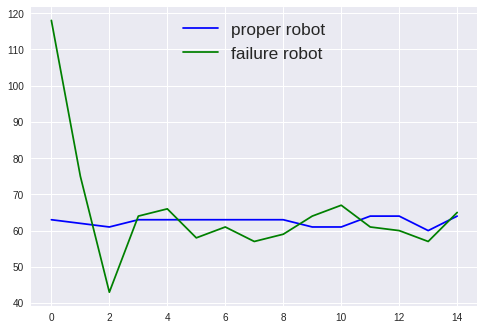

In [29]:

ts1 = timeseries[timeseries.id == 1]
ts20 = timeseries[timeseries.id == 20]
fig, ax = plt.subplots()
ax.plot(ts1.time,ts1.F_z, 'b',label='proper robot' ) 
ax.plot(ts20.time,ts20.F_z, 'g' ,label='failure robot') 
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()


You can already see some differences by eye - but for successful machine learning we have to put these differences into numbers.

For this, tsfresh comes into place. It allows us to automatically extract over 1200 features from those six different time series for each robot.

For extracting all features, we do:



In [30]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 10it [00:26,  2.68s/it]                      


You end up with a DataFrame extracted_features with all more than 1200 different extracted features. 

In [33]:
extracted_features.head()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""","F_x__agg_autocorrelation__f_agg_""median""","F_x__agg_autocorrelation__f_agg_""var""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-inf,T_z__value_count__value_0,T_z__value_count__value_1,T_z__value_count__value_inf,T_z__value_count__value_nan,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,NaN,...,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.0,0.0,0.000000,0.0
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,0.0,0.0,0.0,NaN,...,0.000000,0.000000,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
3,12.0,10.0,-0.029815,1.301043e-17,0.105435,1.0,-1.0,-2.0,0.0,NaN,...,0.000000,-0.090909,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-1.0,-1.0,0.0,NaN,...,0.000000,-0.181818,0.000000,0.0,8.0,1.0,0.0,0.0,0.355556,0.0
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-1.0,-2.0,0.0,NaN,...,-0.076923,-0.090909,-0.222222,0.0,9.0,2.0,0.0,0.0,0.382222,0.0


We will now remove all NaN values (that were created by feature calculators, than can not be used on the given data, e.g. because it has too low statistics) and select only the relevant features next:

In [40]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)
features_filtered = select_features(extracted_features, y)




4764 features after feature selection 


In [42]:
print('{} features after feature selection '.format(len(features_filtered.columns)))

623 features after feature selection 


Further, you can even perform the extraction, imputing and filtering at the same time with the tsfresh.extract_relevant_features() function:

In [43]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 10it [00:22,  2.27s/it]                      
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...,
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [46]:
len(features_filtered_direct.columns)

623

### Try on mode detection data 

In [47]:
## consts :
dataSource = r'../raw-data/utf8'
SAMPLE_FREQ = 50 
FILE_MARGINES = 5* SAMPLE_FREQ  ## number of samples to ignore in the  start and in the end of the file (5 seconds )  
WINDOW_SIZE = 2 * 128  ## sliding window size 
PEAKS_WINDOW_SIZE = 5*WINDOW_SIZE  ## sliding window size for peaks count feature

DEVICE_MODE_LABELS = ['pocket','swing','texting','talking','whatever'] 
USER_MODE_LABELS = ['walking','fastwalking','stairs','static','whatever'] 


In [68]:
def loadFile(root,file):
    data=pd.read_csv(os.path.join(root,file))
    
    print('loading : ' , file) 

    print('loading : ' , len(data) , ' samples from ', file) 
    
    ## usefull property : 
    data['source']=file  

    ## default label values in case file name not contains label  
    data['devicemodeDescription']=DEVICE_MODE_LABELS[-1] ## 'whatever' label 
    data['devicemode'] = len(DEVICE_MODE_LABELS)

    ## search device mode label in file name and add as new properties :
    for label in DEVICE_MODE_LABELS:
        if label.lower() in file.lower():  
            data['devicemodeDescription']=label         ## label name 
            data['devicemode'] = DEVICE_MODE_LABELS.index(label)    ## label index 
            break
           
    ## crop samples from start and from the end of the file :
    margin = min(len(data) / 2 - 1 , FILE_MARGINES)
    data.drop(data.index[range(0,margin)],axis=0,inplace=True)
    data.drop(data.index[range(-margin,-1)],axis=0,inplace=True)   
    ##  print(len(data) , ' samples after cropping ' , margin , 'samples from start-end of the file  ')
    return data 

In [69]:
def loadFiles(inputDir):
    print ('loading files from : ' , inputDir )
    return pd.concat([loadFile(inputDir,f) for f in os.listdir(inputDir) if f.lower().endswith('.csv')])  

In [77]:
rdf = loadFiles(dataSource)
print('=========================================================')
print( 'total train samples ' , len(rdf) , ' from ' ,len(rdf.source.unique()),  ' files ')

('loading files from : ', '../raw-data/utf8')
('loading : ', 'RightPocket.csv')
('loading : ', 7486, ' samples from ', 'RightPocket.csv')
('loading : ', 'TalkingLeftHandFromSignBack.csv')
('loading : ', 3223, ' samples from ', 'TalkingLeftHandFromSignBack.csv')
('loading : ', 'TalkingLeftHandNight1.csv')
('loading : ', 7360, ' samples from ', 'TalkingLeftHandNight1.csv')
('loading : ', 'TalkingLeftHandToSignChexk.csv')
('loading : ', 3366, ' samples from ', 'TalkingLeftHandToSignChexk.csv')
('loading : ', 'Texting2.csv')
('loading : ', 4268, ' samples from ', 'Texting2.csv')
('loading : ', 'SwingRightPhoneDownScBody.csv')
('loading : ', 9258, ' samples from ', 'SwingRightPhoneDownScBody.csv')
('loading : ', 'SwingRight2.csv')
('loading : ', 7244, ' samples from ', 'SwingRight2.csv')
('loading : ', 'swing3.csv')
('loading : ', 4931, ' samples from ', 'swing3.csv')
('loading : ', 'TextingRight.csv')
('loading : ', 5809, ' samples from ', 'TextingRight.csv')
('loading : ', 'swing2.csv')
(

In [78]:
rdf.drop(u'Unnamed: 11',inplace=True,axis=1)
rdf.drop(u'Unnamed: 12',inplace=True,axis=1)
rdf.drop(u'Unnamed: 17',inplace=True,axis=1)

In [ ]:
rdf.groupby('devicemodeDescription').devicemode.count()

In [79]:
rdf.columns

Index([u'Bx', u'By', u'Bz', u'I', u'Latitude', u'Longitude', u'Speed (m/s)',
       u'ax', u'ay', u'az', u'devicemode', u'devicemodeDescription', u'gFy',
       u'gFz', u'gfx', u'p', u'source', u'time', u'wx', u'wy', u'wz'],
      dtype='object')

In [86]:

timeseries = rdf.drop( u'devicemode', axis=1)
timeseries = timeseries.drop(u'devicemodeDescription',axis=1)
y = rdf[u'devicemode']
print(timeseries.head())

          Bx       By       Bz    I  Latitude  Longitude  Speed (m/s)  ax  ay  \
250 -23.7823  31.0425  31.3141  0.0       NaN        NaN          NaN NaN NaN   
251 -23.7823  31.0425  31.3141  0.0       NaN        NaN          NaN NaN NaN   
252 -23.7823  31.0425  31.3141  0.0       NaN        NaN          NaN NaN NaN   
253 -31.2820  28.7933  26.3641  0.0       NaN        NaN          NaN NaN NaN   
254 -31.2820  28.7933  26.3641  0.0       NaN        NaN          NaN NaN NaN   

     az     gFy     gFz     gfx         p           source   time      wx  \
250 NaN -0.5959 -0.1256  0.3389  979.8540  RightPocket.csv  9.784  2.0873   
251 NaN -0.5959 -0.1256  0.3389  979.8540  RightPocket.csv  9.845  2.0873   
252 NaN -0.5959 -0.1256  0.3389  979.8540  RightPocket.csv  9.848  1.1153   
253 NaN -0.5959 -0.1256  0.3389  979.8540  RightPocket.csv  9.924  1.1153   
254 NaN -0.5959 -0.1256  0.3389  979.8147  RightPocket.csv  9.935  1.1153   

         wy      wz  
250 -1.7908  0.2970  
251 -1

In [ ]:
### Use TSFresh for feature extraction :

In [ ]:
timeseries.fillna(0,inplace=True)
extracted_features = extract_features(timeseries, column_id="source", column_sort="time")

Feature Extraction:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
timeseries.columns

cross_validation ( group by source proprty )
K-fold iterator variant with non-overlapping groups. The same group will not appear in two different folds The number of distinct groups has to be at least equal to the number of folds. The folds are approximately balanced in the sense that the number of distinct groups is approximately the same in each fold.

In [ ]:
k= 4 ## len(rdf.source.unique()) 
x_train= extracted_features
y_train = y
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
knn5 = KNeighborsClassifier(n_neighbors=5)
lin_svm = svm.LinearSVC() ## (C=1.0, class_weight=None, dual=True, fit_intercept=True,
                         ## intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                         ## multi_class='ovr', penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [ ]:
def sourceFold(): 
    print ('list of source files for each kfold : ' )    
    _kfold = GroupKFold(n_splits=k) 
    _itr = _kfold.split(x_train, y_train, groups=rdf.source)  
    c = 0 
    sf = {}
    for i in _itr:
        ## print (c , str(rdf.iloc[i[1]].source.unique()))
        sf[c]= str(rdf.iloc[i[1]].source.unique())
        c = c+1
    return sf 

In [ ]:
def CalcKFoldAccuracy(classifier,X,Y,k):
    group_kfold = GroupKFold(n_splits=k)     
    groups_itr = group_kfold.split(X, Y, groups=rdf.source)    
    return cross_val_score(classifier, X, Y, cv=groups_itr, scoring='accuracy')

In [ ]:
print ('KNN : ')
print (CalcKFoldAccuracy(knn5,x_train,y_train,k))
print ('RF : ')
print (CalcKFoldAccuracy(forest,x_train,y_train,k))
print ('SVM : ')
print (CalcKFoldAccuracy(lin_svm,x_train,y_train,k))